# Data Analysis and Mining 2018/ 2019

## Linear Regression Tutorial



#### Important Note:  
**Do not** select the option *Run All Cells* on this notebook or otherwise you will lose the reference plots for the exercises.

### Objectives 
This tutorial explains how to:
- Perform simple linear regression 
- Use correlation analysis to determine whether two quantities are related to justify fitting the data.
- Fit a linear model to the data.
- Evaluate the goodness of fit by plotting residuals and looking for patterns.
- Calculate measures of goodness of fit R2 and adjusted R2

We are going to explore the Baseball dataset presented in class.

### Setup

We will make use of the following Python libraries:

In [1]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

# Stats modules
import statsmodels.api as sm
import scipy.stats as stats

# Auxiliar libraries
from sklearn.metrics import r2_score

### Load dataset

In [2]:
!du -h baseball_DataSet.txt

12K	baseball_DataSet.txt


In [3]:
!head -10 baseball_DataSet.txt

Having a small glance at the data file we can check that:  
    - The data fits in RAM
    - The data is structured, tabular and tab separated
    - No header row
    - No index column
    - The features are all numerical continous and numerical discrete

In [4]:
# load the text file
data = np.loadtxt('baseball_DataSet.txt') 
data.shape

(209, 15)

The data in this file has already excluded the players whose number of bats were less than 100, as stated in the slides.  
The data file *baseball_Content.txt* contains the complete dataset and a header row.

### Features to be analysed

We will seek to model the relationship between the number of home runs, the dependent variable, and the batting average of baseball players(the independent variable).

In [5]:
# You can check the indexes in the file baseball_Content.txt
x = data[:,10:11] # Bat_Average
y = data[:,6] # Home_runs

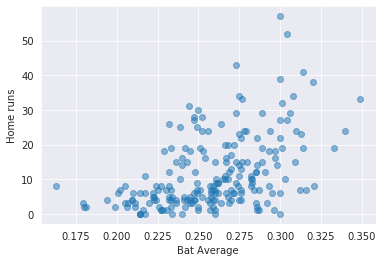

In [6]:
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Bat Average', 
       ylabel='Home runs');

#### Pre-processing details in Numpy

When slicing numpy d-arrays to a 1D array, column slice or row slice, numpy will 'change' you numpy array shape attribute to (vector size,) instead of (vector size,1) or (1, vector size).  
Down the line, when using matrix operations on these vectors you may encounter some errors due to dimensions mismatch. To avoid this just use start:end slice syntax, knowing that the end argument is exclusive.

In [7]:
print(data[:,10].shape)
print(data[:,10:11].shape)

# you can always use reshape if you need to reshape a vector
# notice the -1 argument stating that the row value is undetermined and to be defined by numpy
print(np.reshape(data[:,10],(-1,1)).shape) 

(209,)
(209, 1)
(209, 1)


### Linear Regression

To model a linear relationship between one independent and dependent variable, consider

$$Y = \beta X + \epsilon$$.

Use Least Squares error to estimate the coefficients:  

$$\sum{ (Y - \hat{Y})^2}, \quad \hat{Y} = X\hat{\beta}$$

$$\hat{\beta} = (X^TX)^{-1}X^TY$$  

Although it is perfectly fine to use the analytical formula to obtain the linear regression coefficients it may be faster to use stable linear algebra solvers.

Numpy has several linear algebra routines implemented to aid in linear algebra operations.  
https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html

Using Numpy to estimate the coefficients using the formula above

In [8]:
# re-importing to ease readability
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot

beta = dot(dot(inv(dot(x.T, x)),x.T),y) 
print('Estimated coefficient:', beta[0])

Estimated coefficient: 46.38518284347039


One of the linear algebra routines includes a solver for linear systems, *linalg.lstsq*   
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq

In [9]:
beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta[0])

Estimated coefficients: 46.38518284347039


/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


As expected, the estimated coefficients match.  

### Visualize the estimator 
Plot the actual values of y and the predicted values from the relationship $X\hat{\beta}$.

[46.38518284]


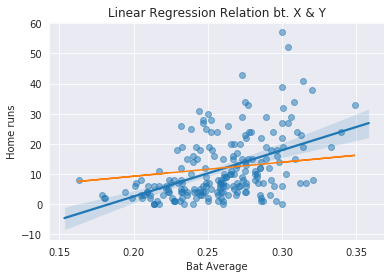

In [10]:
print(beta)
predictions = x * beta # making use of numpy's broadcast
predictions_withouth_intercept = predictions

ax = sns.regplot(x=x, y=y, fit_reg=True, scatter_kws={'alpha':0.5})
ax.set(xlabel='Bat Average', 
       ylabel='Home runs',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x, predictions) # overlay a line plot over a scatter plot 
plt.show()

### Improve the fit 
Include an intercept term $\beta_0$ in your model as $\hat{Y} = \beta_0 + \beta_1X$.  
Calculate  $\beta_0$ by padding $X$ with a column of ones.


In [11]:
constant_term = np.ones(len(x)) 
# append constant term as a column of x
x = np.c_[constant_term, x]
print(x[:5])

[[1.    0.3  ]
 [1.    0.308]
 [1.    0.321]
 [1.    0.297]
 [1.    0.306]]


In [12]:
beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta)

# to use the dot product function we have to state that the coefficients vector is of the shape (2,1)
print('Old shape of coefficients array:',beta.shape)
beta = np.reshape(beta,(-1,1))
print('New shape of coefficients array:',beta.shape)

Estimated coefficients: [-28.14899118 153.55127216]
Old shape of coefficients array: (2,)
New shape of coefficients array: (2, 1)


/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


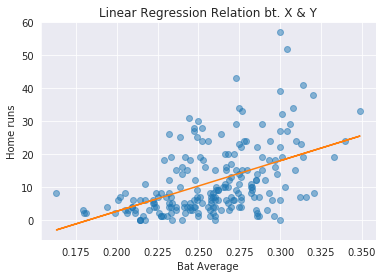

In [13]:
# compute new predictions
predictions_with_intercept = dot(x,beta) 

ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Bat Average', 
       ylabel='Home runs',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x[:,1], predictions_with_intercept) # overlay a line plot over a scatter plot 
plt.show()

### Residuals and Goodness of Fit

One measure of goodness of fit is the Coefficient of Determination, or $R^2$ (r-square)  
This statistic indicates how closely values you obtain from fitting a model match the dependent variable the model is intended to predict.  
The Coefficient of Determination $R^2$ falls between $0$ and $1$. The higher the value of $R^2$, the better the model is at predicting the data.  
Statisticians often define $R^2$ using the residual variance from a fitted model:  

$$R^2 = 1 – \frac{SSresid}{SStotal}$$

$SSresid$ is the sum of the squared residuals from the regression.   
$SStotal$ is the sum of the squared differences from the mean of the dependent variable (total sum of squares).   
Both are positive scalars.

**Exercise** - Complete the code block below.

In [14]:
### SSTotal 
# -> squared sum of deviations from mean
def ss_total(y):
    #ybar
    mean = np.mean(y)
    return np.sum((y-mean)**2)

### SSResiduals & SSErrors
# Watch out for broadcast effects
# y shape is (209,) and predictions shape is (209,1)
# shapes have to agree when using element-wise operations in numpy
# The regression sum of squares, also called the explained sum of squares:
# Lecture: SSR -> squared sum of deviations of predictions from mean of dataset
def ss_reg(pred, y):
    #ybar
    y = np.reshape(y,(-1,1))
    mean = np.mean(y)
    return np.sum((pred-mean)**2)

# The sum of squares of residuals, also called the residual sum of squares:
# squared element-wise deviation of prediction from actual value
def ss_res(pred, y):
    y = np.reshape(y,(-1,1))
    return np.sum((y-pred)**2)

# SStotal
sstotal = ss_total(y)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance = (len(y) - 1 ) * np.var(y, ddof=1) 

# SSReg
ssreg = ss_reg(predictions_with_intercept, y)

# SSRes
ssres = ss_res(predictions_with_intercept, y)

### R^2
rsq_with_intercept = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model with intercept:', np.round(rsq_with_intercept,2))

SStotal: 22473.5024
SSreg: 5179.0486
SSres: 17294.4538
Coefficient of Determinacy, model with intercept: 0.23


**R:** This should be your output

```
SStotal: 22473.5024
SSreg: 5179.0486
SSres: 17294.4538
Coefficient of Determinacy, model with intercept: 0.23
```

We could now use these metrics to compare model fits to the data.

Scikit-Learn also provides a function (*r2_score*) to compute $R^2$

In [15]:
print('Coefficient of Determinacy:',round(r2_score(y_true=y, y_pred=predictions_with_intercept),2))

Coefficient of Determinacy: 0.23


The next step would be to check the goodness of fit.

**Exercise** - Complete the code block below. Your output should match the above.

In [ ]:
##### DON'T RUN THIS CELL BLOCK ######

In [16]:
print(x.shape)

(209, 2)


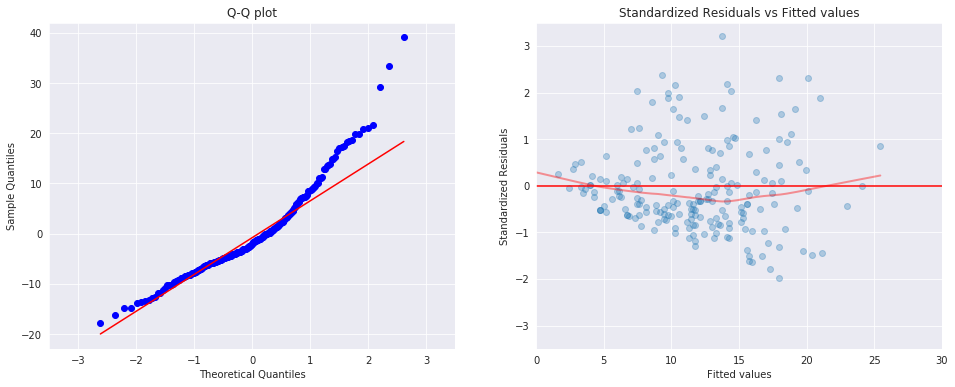

In [17]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x,beta)
residuals = y - predictions[:,0]
degrees_of_freedom = len(y) - x.shape[1]
x_val = x[:,1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)

residuals_standard_error = np.sqrt(ssres / degrees_of_freedom)
mean_independent_variable = np.sum(x_val)/len(x_val)
leverage = (1 / len(x_val)) +   (x_val-mean_independent_variable)**2\
                                    /np.sum((x_val-mean_independent_variable)**2) 
leverage = np.reshape(leverage,(-1,1))
s_resid = residuals_standard_error * np.sqrt(1-leverage)
standardized_rediduals = residuals / s_resid[:,0]
sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(0, 30)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');

#### Linear Regression through the origin (RTO) details 

When the Linear Regression model is __forced__ to go through the origin, and it does not go through $(\bar{x},\bar{y})$, the definition of $SStotal$ and $SSres$ changes slightly, and thus $R^2$.  
You can check the details in 
https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf

"‘It is natural to ask if there is a measure analogous to $R^2$ for the no-intercept model" (that does not go through $(\bar{x},\bar{y})$)

$SStotal = \sum{Y_i^2}$  
$SSres = \sum{\hat{Y}_i^2}$

In [18]:
sstotal = np.sum(y**2)
ssreg = np.sum(predictions[:,0]**2)
ssres = ss_res(predictions, y)


### R^2
rsq_without_intercept = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model without intercept:', np.round(rsq_without_intercept,2))

SStotal: 50402.0
SSreg: 33107.5462
SSres: 17294.4538
Coefficient of Determinacy, model without intercept: 0.66


Discrepancy with standard libraries, as refered in the article.

In [19]:
print('Coefficient of Determinacy:',round(r2_score(y_true=y, y_pred=predictions_withouth_intercept),2))

Coefficient of Determinacy: 0.12


### Feature Engineering

Do regression analysis with a Log transformation on the target class. Don't forget to eliminate the zero values' cases.  

In [20]:
mask = y != 0
y_masked = y[mask]
x_masked = x[mask]
y_masked = np.log(y_masked)

/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Estimated coefficients: [-1.43856132 13.63752354]


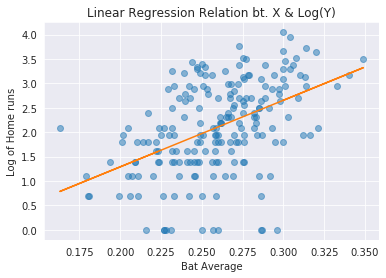

In [21]:
# estimate the coefficients
beta = np.linalg.lstsq(x_masked, y_masked)[0]
print('Estimated coefficients:', beta)
beta = np.reshape(beta,(-1,1))

# compute new predictions
predictions = dot(x_masked,beta) 

ax = sns.regplot(x=x_masked[:,1], y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Bat Average', 
       ylabel='Log of Home runs',
       title='Linear Regression Relation bt. X & Log(Y)');
plt.plot(x_masked[:,1], predictions) # overlay a line plot over a scatter plot 
plt.show()

In [22]:
# SStotal
sstotal = ss_total(y_masked)

# SSReg
ssreg = ss_reg(predictions, y_masked)

# SSRes
ssres = ss_res(predictions, y_masked)

### R^2
rsq = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy:', np.round(rsq,2))

SStotal: 177.7023
SSreg: 38.8956
SSres: 138.8067
Coefficient of Determinacy: 0.22


### Statistical inference

The linear system solver from the Numpy library computed the coefficients for the linear system. Namely

In [ ]:
print(beta)

We can also look at the ranges of our independent variable to understand a little bit more about the domain of our fitted model.

In [23]:
np.min(x[:,1]), np.max(x[:,1])

(0.163, 0.349)

First, we should be wary in interpreting our model outside the domain of our independent variables, i.e., outside of the interval range stated above.  

Second, in this analysis, it is not wise to interpret the case when the batting average equals zero, not only it is out of the variable's domain, it just dosen't make a lot of sense in general.

We can interpret our model by stating that we expect a logarithm growth in Home Runs of $(-1.43856132 + 13.63752354 \cdot BattingAverage)$ for each unit increase in Batting Average. Likewise, we could state that we expect a growth in Home Runs of $(e^{-1.43856132 + 13.63752354 \cdot BattingAverage})$ for each unit increase in Batting Average.  

Plotting the last expression:

In [25]:
# compute new predictions
predictions = np.exp(dot(x,beta))
print(predictions)

[[14.19224579]
 [15.82824389]
 [18.89852239]
 [13.62332195]
 [15.40236217]
 [ 9.82060381]
 [16.26590143]
 [12.90007441]
 [11.25551065]
 [14.19224579]
 [11.72555226]
 [ 9.82060381]
 [ 6.61271576]
 [22.25872399]
 [10.51360598]
 [12.90007441]
 [10.09214759]
 [13.81038295]
 [18.64254278]
 [ 6.26165378]
 [10.09214759]
 [10.09214759]
 [14.19224579]
 [14.78492846]
 [ 8.45256419]
 [14.98793941]
 [ 7.17655575]
 [ 5.61445287]
 [10.65796766]
 [12.2152233 ]
 [12.2152233 ]
 [ 7.57891206]
 [17.17785533]
 [ 5.69154458]
 [ 9.42692577]
 [ 5.9292293 ]
 [14.19224579]
 [11.10305527]
 [ 9.82060381]
 [ 6.17683996]
 [ 7.78847213]
 [ 7.3749905 ]
 [14.38711864]
 [ 9.17328074]
 [10.37119968]
 [13.07720454]
 [10.80431156]
 [ 8.68628111]
 [11.5667302 ]
 [ 6.88886952]
 [ 9.04902907]
 [ 7.3749905 ]
 [ 7.07934963]
 [11.72555226]
 [ 7.27509659]
 [14.38711864]
 [14.98793941]
 [ 8.3380746 ]
 [ 6.98346017]
 [ 7.07934963]
 [16.71566037]
 [24.4883302 ]
 [ 8.3380746 ]
 [ 8.92646039]
 [ 6.70351456]
 [ 8.45256419]
 [ 6.88886

#### Plotting details
Remember that the instruction *plot* plots a line between each consecutive point that you pass on. If your data is a straight line, then the order of the data that you pass onto *plot* does not matter, but if is not a straight line/function as in the exponential case, then we need to order the data first by the domain. This is ok for continuous functions.

In [26]:
# order the data first
temp = np.c_[x[:,1], predictions]
# sort by first column
temp = temp[temp[:,0].argsort()] 

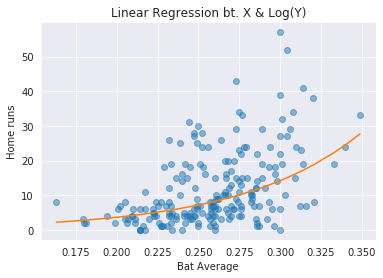

In [27]:
ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Bat Average', 
       ylabel='Home runs',
       title='Linear Regression bt. X & Log(Y)');

# Remeber that the instruction plot 
plt.plot(temp[:,0], temp[:,1]) # overlay a line plot over a scatter plot 
plt.show()

When we are using more expressive/parsimonious machine learning algorithms, such as linear regression, we do so with the expectation of being capable of obtaining more information about the model fit.  

Can we expect for this model to hold for a new collected sample from the same population? What is the degree of uncertainty in our model's parameters/coefficients ?  
The good thing about linear regression is that if we validate certain conditions we can infer a degree of uncertainty about our model parameters and see how likely our point estimate varies from the population parameter.

In [ ]:
##### DON'T RUN THIS CELL BLOCK ######

**Exercise** - Complete the code block below. Your output should match the above.

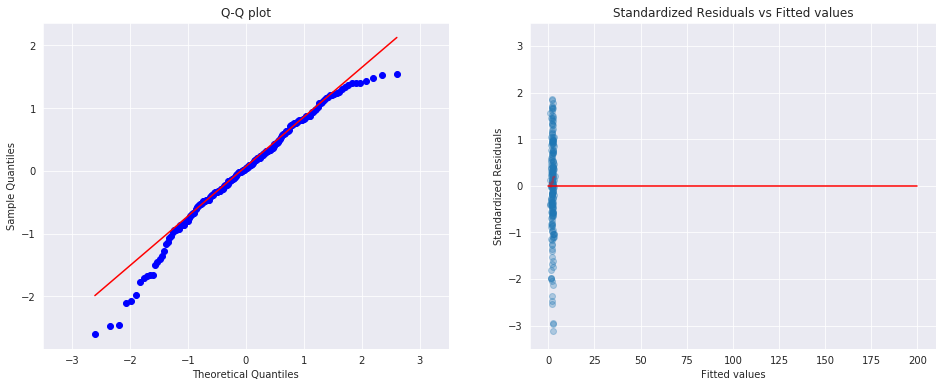

In [28]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x_masked,beta)
residuals = y_masked - predictions[:,0]
degrees_of_freedom = len(x_masked) - x.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)

'''
recall the solution for our reference dataset

residuals_standard_error = np.sqrt(ssres / degrees_of_freedom)
mean_independent_variable = np.sum(x_val)/len(x_val)
leverage = (1 / len(x_val)) +   (x_val-mean_independent_variable)**2\
                                    /np.sum((x_val-mean_independent_variable)**2) 
leverage = np.reshape(leverage,(-1,1))
s_resid = residuals_standard_error * np.sqrt(1-leverage)
standardized_rediduals = residuals / s_resid[:,0]

'''

residuals_standard_error = np.sqrt(ssres  / degrees_of_freedom)
mean_independent_variable = np.sum(x_masked) / len(x_masked)
leverage = (1 / len(x_masked)) + (x_masked - mean_independent_variable) ** 2\
                                 / np.sum((x_masked - mean_independent_variable)**2)
s_resid = residuals_standard_error * np.sqrt(1-leverage)
standardized_rediduals = residuals / s_resid[:,0]


sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-3.5,3.5)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');

The assumptions for inference on linear regression models 

1. Zero Mean Assumption  
    $E(\epsilon |X) = 0$, in the second figure we can check that the mean of residuals along the domain falls relatively on a straight line, as shown by over positioning of the lowess curve (applied to the data) and the horizontal line at zero.  
2. Constant Variance Assumption  
    Checking the second figure, the constant variance assumption in our model is slightly violated. A good example is presented below.  
    <img src='https://i.stack.imgur.com/Cc2x4.png' height="400" width="400">  
    Source:https://stats.stackexchange.com/q/52092
3. Independence Assumption  
    In the second figure, the points are more or less symmetrically distributed around the horizontal line, meaning the model does not systematically underpredicts or overpredicts when the independent variable has a particular configuration.  
4. Normality Assumption  
    The first plot shows us that there is a slight S shape, more pronounced at higher values. 

Having assumed that the necessary assumptions for inference hold in the fitted model, it is necessary to calculate the uncertainty associated with the model's estimated coefficients.

$\left|
\begin{array}{l}
\mathbf{y} = \mathbf{X} \mathbf{\beta} + \mathbf{\epsilon} \\
 \mathbf{\epsilon} \sim N(0, \sigma^2 \mathbf{I}),
\end{array}
\right.$

$\hat{\mathbf{\beta}} = (\mathbf{X}^{\prime} \mathbf{X})^{-1} \mathbf{X}^{\prime} \mathbf{y}$

$E(\hat{\mathbf{\beta}}|\mathbf{X}) = E((\mathbf{X}^{\prime} \mathbf{X})^{-1} \mathbf{X}^{\prime} (\mathbf{X}\mathbf{\beta}+\mathbf{\epsilon})|\mathbf{X}) = \mathbf{\beta} + ((\mathbf{X}^{\prime} \mathbf{X})^{-1} \mathbf{X}^{\prime})E(\mathbf{\epsilon}|\mathbf{X}) = \mathbf{\beta}$

$\textrm{Var}(\hat{\mathbf{\beta}}) = E(\hat{\mathbf{\beta}}-E(\hat{\mathbf{\beta}}|\mathbf{X}))^2=\textrm{Var}((\mathbf{X}^{\prime} \mathbf{X})^{-1} \mathbf{X}^{\prime} \mathbf{\epsilon})
=(\mathbf{X}^{\prime} \mathbf{X})^{-1} \mathbf{X}^{\prime}
 \;\sigma^2 \mathbf{I} \; \mathbf{X}  (\mathbf{X}^{\prime} \mathbf{X})^{-1}
= \sigma^2  (\mathbf{X}^{\prime} \mathbf{X})^{-1}$

You should compute the coefficients standard errors.

**Exercise** - Complete the code block below.

In [96]:
# https://stats.stackexchange.com/questions/44838/how-are-the-standard-errors-of-coefficients-calculated-in-a-regression/44841#44841
# k=2 because our inference is based on x and y
n = len(x[:,1])
sigma_degrees_of_freedom = n - 2
# mean squared error
sigma_sqr = ssres / sigma_degrees_of_freedom
variance_covmatrix = inv((np.matmul(x.T,x)))
coeff_stde = [np.sqrt(variance_covmatrix[0,0]),np.sqrt(variance_covmatrix[1,1])]
print('Coefficients\' Standard Errors:',coeff_stde)


Coefficients' Standard Errors: [0.5560935064476284, 2.133675776913448]


**R:** This should be your output.

```
Coefficients' Standard Errors: [0.47752281 1.82626655]
```

**Exercise** - Complete the code block below.

In [ ]:
expected_value = 0.0

# For each coefficient
for i in range(len(beta)):    
    ttest = None

    #Degrees of freedom
    df = x_masked.shape[0] - (i+1)
    # https://stats.stackexchange.com/a/140395
    
    pval = stats.t.sf(np.abs(ttest), df)*2  # two-sided pvalue = Prob(abs(t)>tt)
    # https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#t-test-and-ks-test


    print('Test statistc for coefficient estimate ',i,':',ttest,'| P-value:', np.round(pval,8))

**R:** This should be your output.

```
Test statistc for coefficient estimate  0 : [-3.01254993] | P-value: [0.00292529]
Test statistc for coefficient estimate  1 : [7.46743325] | P-value: [0.]
```

It remains to calculate the confidence intervals. Next, let's consider a 95% confidence interval.

**Exercise** - Complete the code block below.

In [ ]:
df = None
one_minus_alpha = None
alpha = None
t_student_values = stats.t.ppf( [alpha,one_minus_alpha], df)
stde = None

**R:** This should be your output.

```
array([[-2.38021556, -0.49690708],
       [10.03620527, 17.23884181]])
```

We can also look for the correlation coefficient between the feature Batting Average, independent variable, and the target Home Runs, dependent variable.

In [ ]:
print('Correlation:',np.corrcoef(y_masked,x_masked[:,1])[0,1])

Check that, in the simple linear regression model,i.e. onde independent variable, the $R^2$ value is equal to the square fo the correlation between the independent variable and the dependent variable .

In [ ]:
print('Correlation:',round((np.corrcoef(y_masked,x_masked[:,1])[0,1])**2,2))